<a href="https://colab.research.google.com/github/TechyMT/ClassWork/blob/main/DSBDA/Assgn9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analytics 2
Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset.

Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset

In [137]:
!pip install recall

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [139]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [140]:
print(df.shape)
print(df.head())

(400, 5)
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [142]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [143]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: xlabel='Age'>

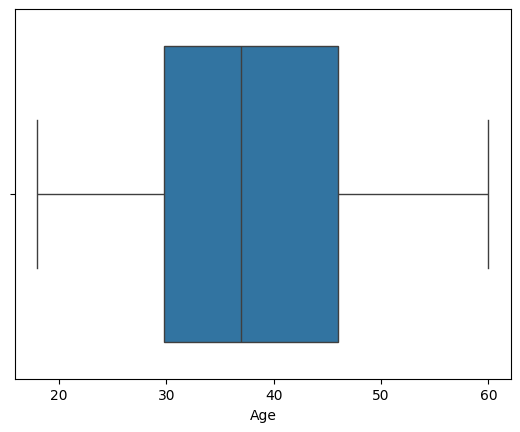

In [144]:
sns.boxplot(data =df, x=df["Age"])

<Axes: xlabel='EstimatedSalary'>

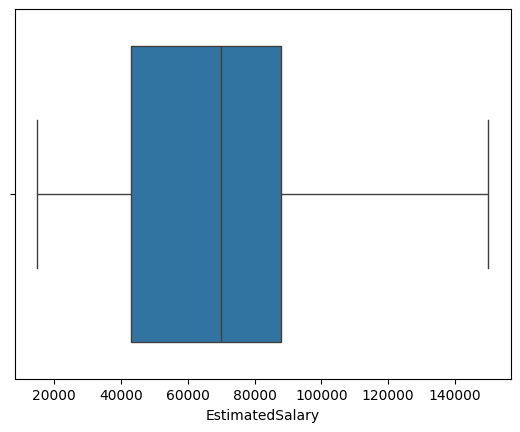

In [145]:
sns.boxplot(data=df, x=df["EstimatedSalary"])

<Axes: xlabel='Age', ylabel='count'>

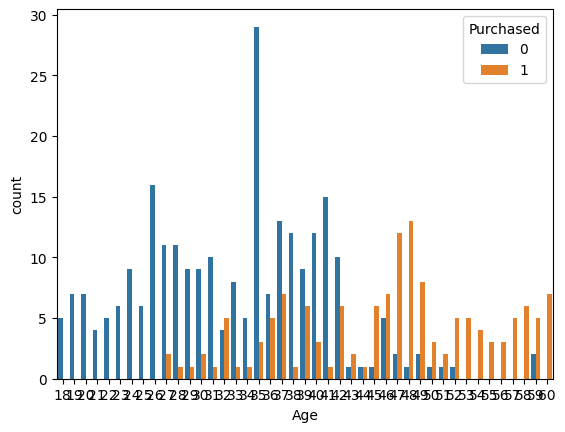

In [146]:
sns.countplot(data =df, x=df["Age"], hue="Purchased")

In [147]:
label_encoder = LabelEncoder()

df["Gender"] = label_encoder.fit_transform(df["Gender"])
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [148]:
df["Age"].value_counts()

Age
35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: count, dtype: int64

In [149]:
df["EstimatedSalary"].value_counts()

EstimatedSalary
72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: count, Length: 117, dtype: int64

In [150]:
def normalise_data(feature):
  global df
  df[feature] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())

normalise_data("EstimatedSalary")


<Axes: >

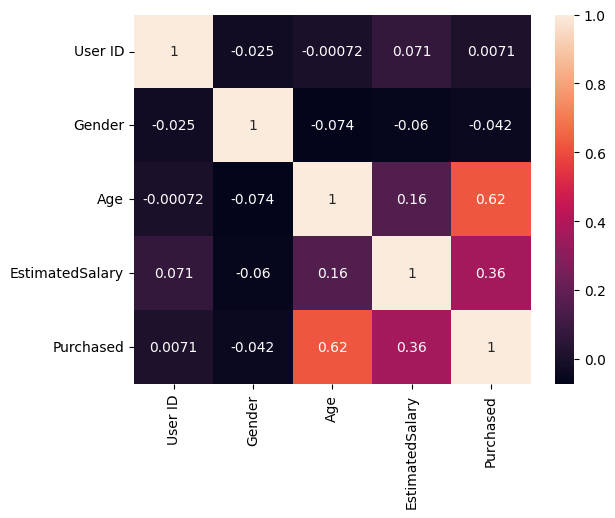

In [151]:
corr = df.corr()

sns.heatmap(data =corr, annot = True)

In [152]:
X = df.drop(["User ID", "Purchased"], axis = 1)
y = df["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.2, random_state= 42)


[[49  3]
 [ 7 21]]


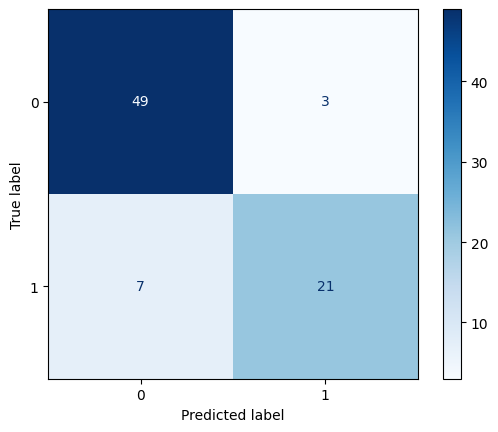

In [153]:
scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


model = LogisticRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
print(matrix)

tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).reshape(-1)

conf_matrix = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels= model.classes_)
conf_matrix.plot(cmap = "Blues")



In [154]:
accuracy = accuracy_score(y_test,y_pred)
error_rate = (fp+fn)/ (tp+tn+fp+fn)
recall = tp / (tp+fn)
true_neg = tn / (tn+fp)
precision = tp/ (fp+tp)
false_pos = fp / (tn + fp)


print(classification_report(y_test, y_pred))


print(accuracy, error_rate, recall, true_neg, precision, false_pos)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        52
           1       0.88      0.75      0.81        28

    accuracy                           0.88        80
   macro avg       0.88      0.85      0.86        80
weighted avg       0.88      0.88      0.87        80

0.875 0.125 0.75 0.9423076923076923 0.875 0.057692307692307696
